In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import keras as keras
from keras import models
from keras import layers

Using TensorFlow backend.
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [3]:
date = pd.read_csv("Training data_2.csv",usecols = ["Date"])

In [4]:
data = pd.read_csv("Training data_2.csv", index_col = "Date")

In [5]:
data.head()

,Price,1d Price_C,5d Price_C,10d Price_C,T10Y2Y,T10Y2Y_C,S&P500 Close,1d S&P500 Close_C,5d S&P500 Close_C,10d S&P500 Close_C,University of Michigan Consumer,M2,Average Weekly Hours of Production,Building Permits,Manufacturers' New Orders Durable Goods,Real personal income excluding current transfer receipts,"All Employees, Total Nonfarm",Industrial Production Index,Inventories to Sales Ratios,Label
Date,,,,,,,,,,,,,,,,,,,,
1997/1/16,12.03,-0.005785,-0.004139,-0.009061,0.57,0.02,769.750000,0.003324,0.013496,0.029559,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,Little Low Point
1997/1/17,12.08,0.004156,0.008347,-0.004122,0.56,-0.01,776.169983,0.008340,0.021949,0.038146,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,Little Low Point
1997/1/18,12.20,0.009934,0.019215,0.006601,0.56,0.00,776.169983,0.000000,0.021935,0.030456,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,Little Low Point
1997/1/20,12.21,0.000820,0.008258,0.003287,0.56,0.00,776.700012,0.000683,0.010197,0.037800,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,Little Low Point
1997/1/21,12.19,-0.001638,0.007438,-0.000820,0.53,-0.03,782.719971,0.007751,0.020229,0.036921,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,Low Point


In [6]:
data.shape

(5824, 20)

In [7]:
x_data = data.drop(["Label"], axis=1)
y_data = data["Label"].to_frame()

#### Handling y data

In [8]:
# Transfer Label into one-hot-encoding form
y_data["Label_Num"] = 0
for index, row in y_data.iterrows():
    #print(index, row)
    if row["Label"] == "Extremely High Point":
        y_data.loc[index, "Label_Num"] = -3
    elif row["Label"] == "High Point":
        y_data.loc[index, "Label_Num"] = -2
    elif row["Label"] == "Little High Point":
        y_data.loc[index, "Label_Num"] = -1
    elif row["Label"] == "Little Low Point":
        y_data.loc[index, "Label_Num"] = 1
    elif row["Label"] == "Low Point":
        y_data.loc[index, "Label_Num"] = 2
    elif row["Label"] == "Extremely Low Point":
        y_data.loc[index, "Label_Num"] = 3
y_data.head()

,Label,Label_Num
Date,,
1997/1/16,Little Low Point,1
1997/1/17,Little Low Point,1
1997/1/18,Little Low Point,1
1997/1/20,Little Low Point,1
1997/1/21,Low Point,2


In [9]:
y_data['Label_Num'].value_counts()

 1    1452
-1    1448
 2     876
-2     873
-3     588
 3     587
Name: Label_Num, dtype: int64

In [10]:
y_data_ohe = pd.get_dummies(y_data).drop("Label_Num", axis=1)

In [11]:
y_data_ohe.head()

,Label_Extremely High Point,Label_Extremely Low Point,Label_High Point,Label_Little High Point,Label_Little Low Point,Label_Low Point
Date,,,,,,
1997/1/16,0,0,0,0,1,0
1997/1/17,0,0,0,0,1,0
1997/1/18,0,0,0,0,1,0
1997/1/20,0,0,0,0,1,0
1997/1/21,0,0,0,0,0,1


#### Handling x data

In [12]:
x_data.head()

,Price,1d Price_C,5d Price_C,10d Price_C,T10Y2Y,T10Y2Y_C,S&P500 Close,1d S&P500 Close_C,5d S&P500 Close_C,10d S&P500 Close_C,University of Michigan Consumer,M2,Average Weekly Hours of Production,Building Permits,Manufacturers' New Orders Durable Goods,Real personal income excluding current transfer receipts,"All Employees, Total Nonfarm",Industrial Production Index,Inventories to Sales Ratios
Date,,,,,,,,,,,,,,,,,,,
1997/1/16,12.03,-0.005785,-0.004139,-0.009061,0.57,0.02,769.750000,0.003324,0.013496,0.029559,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43
1997/1/17,12.08,0.004156,0.008347,-0.004122,0.56,-0.01,776.169983,0.008340,0.021949,0.038146,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43
1997/1/18,12.20,0.009934,0.019215,0.006601,0.56,0.00,776.169983,0.000000,0.021935,0.030456,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43
1997/1/20,12.21,0.000820,0.008258,0.003287,0.56,0.00,776.700012,0.000683,0.010197,0.037800,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43
1997/1/21,12.19,-0.001638,0.007438,-0.000820,0.53,-0.03,782.719971,0.007751,0.020229,0.036921,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43


In [13]:
def monthly_data_change(df, col_name):
    pre_val = df[col_name][0] # the value in col_name in the previous month
    in_mon = "" # the current month
    change_array = np.zeros(len(df)) # new array to be returned
    
    i = 0
    first_mon = True
    
    for index, row in df.iterrows():
        if first_mon and in_mon == "" :
            in_mon = index.split("/")[1]

        day_mon = index.split("/")[1]
        day_val = df[col_name][index]
        #print("day_mon = ", day_mon, ", day_val = ", day_val)
        if day_mon != in_mon: # entered a new month
            if not first_mon:
                pre_val = day_val
                first_mon = False
            in_mon = day_mon
        if pre_val !=0:
            change_array[i] = (day_val - pre_val)/pre_val
        else:
            change_array[i] = 0
        i += 1
    return change_array

In [14]:
# Create _C columns for the change of each monthly-changed features with the data in the previous month
for i in range(10,19):
    col_name = x_data.columns[i]
    x_data[col_name + "_C"] =monthly_data_change(x_data, col_name)

In [15]:
pd.set_option('display.max_columns',30)
x_data.head()

,Price,1d Price_C,5d Price_C,10d Price_C,T10Y2Y,T10Y2Y_C,S&P500 Close,1d S&P500 Close_C,5d S&P500 Close_C,10d S&P500 Close_C,University of Michigan Consumer,M2,Average Weekly Hours of Production,Building Permits,Manufacturers' New Orders Durable Goods,Real personal income excluding current transfer receipts,"All Employees, Total Nonfarm",Industrial Production Index,Inventories to Sales Ratios,University of Michigan Consumer_C,M2_C,Average Weekly Hours of Production_C,Building Permits_C,Manufacturers' New Orders Durable Goods_C,Real personal income excluding current transfer receipts_C,"All Employees, Total Nonfarm_C",Industrial Production Index_C,Inventories to Sales Ratios_C
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1997/1/16,12.03,-0.005785,-0.004139,-0.009061,0.57,0.02,769.750000,0.003324,0.013496,0.029559,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997/1/17,12.08,0.004156,0.008347,-0.004122,0.56,-0.01,776.169983,0.008340,0.021949,0.038146,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997/1/18,12.20,0.009934,0.019215,0.006601,0.56,0.00,776.169983,0.000000,0.021935,0.030456,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997/1/20,12.21,0.000820,0.008258,0.003287,0.56,0.00,776.700012,0.000683,0.010197,0.037800,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997/1/21,12.19,-0.001638,0.007438,-0.000820,0.53,-0.03,782.719971,0.007751,0.020229,0.036921,97.4,3490.66,41.3,1382,170783,7951.0,121363,85.9397,1.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# 只採用以下欄位預測
x_data_sel = x_data.iloc[14:].copy()
x_data_sel = x_data_sel.drop(x_data_sel.columns[10:19], axis=1)
x_data_sel = x_data_sel.iloc[:,:10].copy().drop(['Price','T10Y2Y','S&P500 Close'], axis=1)
x_data_sel.head()

,1d Price_C,5d Price_C,10d Price_C,T10Y2Y_C,1d S&P500 Close_C,5d S&P500 Close_C,10d S&P500 Close_C
Date,,,,,,,
1997/2/1,0.004039,0.020525,0.019688,0.00,0.000000,0.027633,0.004395
1997/2/3,0.000805,0.023868,0.023026,-0.01,0.000725,0.028378,0.000636
1997/2/11,-0.014469,-0.000815,0.000816,-0.03,0.003635,0.022123,0.015472
1997/2/12,-0.003263,-0.004075,-0.000818,-0.06,0.016692,0.023719,0.041855
1997/2/13,0.004092,-0.008885,0.008217,0.00,0.011273,0.032640,0.053600


In [17]:
x_data_sel.shape

(5810, 7)

In [18]:
y_data_ohe = y_data_ohe[14:]
y_data_ohe.shape

(5810, 6)

#### Split the data into training and testing set

In [19]:
# Split the data into training and testing set with 7:3 ratio
cut = int( x_data_sel.shape[0] * 0.7 )
x_train, x_test, y_train, y_test = x_data_sel[:cut], x_data_sel[cut:], y_data_ohe[:cut], y_data_ohe[cut:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4066, 7)
(4066, 6)
(1744, 7)
(1744, 6)


In [20]:
# Standardize the x data
# Fit it with training data and use it the tranform both training and testing data

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit( x_train )
x_train_std = scalar.transform( x_train )
x_test_std = scalar.transform( x_test )

In [21]:
# No standardization
x_train_std = x_train.values
x_test_std = x_test.values

In [22]:
y_train = y_train.values
y_test = y_test.values

In [23]:
print(x_train_std.shape, y_train.shape)

(4066, 7) (4066, 6)


In [24]:
# Split the training data into partial training set and validation set
partial_x_train = x_train_std[:-800]
x_val = x_train_std[-800:]
partial_y_train = y_train[:-800]
y_val = y_train[-800:]
print(partial_x_train.shape, partial_y_train.shape)
print(x_val.shape, y_val.shape)

(3266, 7) (3266, 6)
(800, 7) (800, 6)


In [25]:
def build_model(partial_x_train, partial_y_train, x_val, y_val, epochs, batch_size):
    model = models.Sequential()
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(16, activation='relu', input_shape=(partial_x_train.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],)
    class_weight = {0:1.1, 1:1.3, 2:0.9, 3:0.7, 4:0.7, 5:0.9}
    # 0 for Extremely High Point, 1 for Extremely Low Point, 2 for High Point, 3 for Little High Point, 4 for Little Low Point, 5 for Low Point
    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        verbose=2,
                        class_weight = class_weight)
    return (model, history)

def loss_plot(history):
    # plot the loss value
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.close()

def accu_plot(history):
    # plot the accuracy rate
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Acuracy')
    plt.legend()
    plt.show()
    plt.close()

In [26]:
model, history = build_model(partial_x_train, partial_y_train, x_val, y_val, epochs=25, batch_size=90)


Train on 3266 samples, validate on 800 samples
Epoch 1/25
 - 1s - loss: 1.5823 - accuracy: 0.2088 - val_loss: 1.7881 - val_accuracy: 0.2237
Epoch 2/25
 - 0s - loss: 1.5806 - accuracy: 0.2180 - val_loss: 1.7872 - val_accuracy: 0.2450
Epoch 3/25
 - 0s - loss: 1.5794 - accuracy: 0.2146 - val_loss: 1.7860 - val_accuracy: 0.2500
Epoch 4/25
 - 0s - loss: 1.5783 - accuracy: 0.2195 - val_loss: 1.7831 - val_accuracy: 0.2575
Epoch 5/25
 - 0s - loss: 1.5777 - accuracy: 0.2269 - val_loss: 1.7832 - val_accuracy: 0.2500
Epoch 6/25
 - 0s - loss: 1.5768 - accuracy: 0.2205 - val_loss: 1.7830 - val_accuracy: 0.2512
Epoch 7/25
 - 0s - loss: 1.5754 - accuracy: 0.2116 - val_loss: 1.7808 - val_accuracy: 0.2512
Epoch 8/25
 - 0s - loss: 1.5742 - accuracy: 0.2211 - val_loss: 1.7802 - val_accuracy: 0.2488
Epoch 9/25
 - 0s - loss: 1.5738 - accuracy: 0.2152 - val_loss: 1.7788 - val_accuracy: 0.2500
Epoch 10/25
 - 0s - loss: 1.5733 - accuracy: 0.2125 - val_loss: 1.7764 - val_accuracy: 0.2512
Epoch 11/25
 - 0s - l

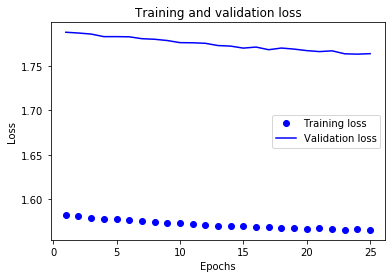

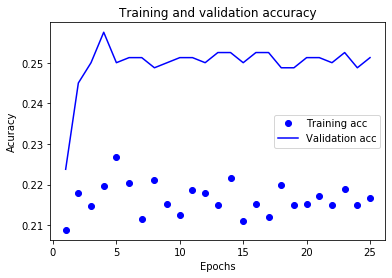

In [27]:
# Plot
loss_plot(history)
accu_plot(history)

In [28]:
y_pre1 = model.predict(x_test_std)
y_pre1

array([[0.14533088, 0.15101236, 0.17354193, 0.194615  , 0.19276927,
        0.14273058],
       [0.14533105, 0.15141217, 0.1739229 , 0.19420484, 0.19226564,
        0.1428634 ],
       [0.1455437 , 0.15197742, 0.17341572, 0.19429703, 0.19307971,
        0.14168644],
       ...,
       [0.14559223, 0.15183826, 0.1730428 , 0.19459285, 0.19360751,
        0.1413263 ],
       [0.14577714, 0.15194184, 0.17221761, 0.1950737 , 0.19483078,
        0.14015898],
       [0.14538404, 0.15057196, 0.17285484, 0.19523908, 0.19371723,
        0.14223279]], dtype=float32)

In [29]:
x_test_std.shape

(1744, 7)

In [30]:
pre_final_1 = np.argmax(y_pre1,axis=1)

In [31]:
unique1, counts1 = np.unique(pre_final_1, return_counts=True)
dict(zip(unique1, counts1))

{1: 299, 3: 1414, 4: 31}

In [32]:
date_sel = date.iloc[-1752:].copy()
date_sel = date_sel.reset_index().drop('index', axis=1)
date_sel.head()

,Date
0,2012/11/20
1,2012/11/21
2,2012/11/22
3,2012/11/23
4,2012/11/26


In [33]:
predict_file = pd.concat( [date_sel['Date'], pd.Series(pre_final_1)], axis=1 )
predict_file.columns = ['Date', 'Label']
predict_file[:10]

,Date,Label
0,2012/11/20,3.0
1,2012/11/21,3.0
2,2012/11/22,3.0
3,2012/11/23,3.0
4,2012/11/26,3.0
5,2012/11/27,3.0
6,2012/11/28,3.0
7,2012/11/29,3.0
8,2012/11/30,3.0
9,2012/12/3,3.0


In [34]:
predict_file.to_csv("Prediction.csv", index = False)

In [35]:
pre_final_1

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [36]:
y_test_index = np.argmax(y_test, axis=1)
y_test_index

array([4, 4, 5, ..., 4, 3, 2], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix( y_test_index,pre_final_1, normalize='all')

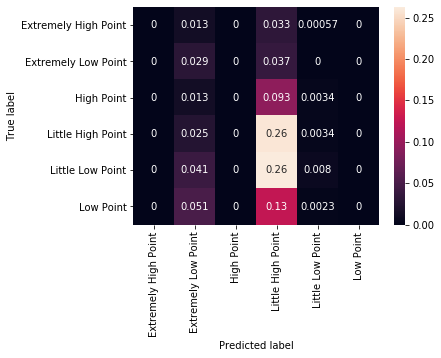

In [38]:
cm_df = pd.DataFrame(cm,
                     index = ['Extremely High Point', 'Extremely Low Point', 'High Point', 'Little High Point', 'Little Low Point', 'Low Point'], 
                     columns = ['Extremely High Point', 'Extremely Low Point', 'High Point', 'Little High Point', 'Little Low Point', 'Low Point'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Try SVM Model

In [39]:
y_train_one_col = np.argmax(y_train, axis=1)
y_train_one_col

array([4, 4, 5, ..., 5, 5, 4], dtype=int64)

In [40]:
y_test_one_col = np.argmax(y_test, axis=1)
y_test_one_col

array([4, 4, 5, ..., 4, 3, 2], dtype=int64)

In [41]:
from sklearn.svm import SVC
model_SVM = SVC(gamma='auto')
model_SVM.fit(x_train_std, y_train_one_col)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
pre_y_SVM = model_SVM.predict(x_test_std)

In [43]:
accu = model_SVM.score(x_test_std, y_test_one_col)
accu

0.286697247706422

In [44]:
unique_SVM, counts_SVM = np.unique(pre_y_SVM, return_counts=True)
dict(zip(unique_SVM, counts_SVM))

{3: 1744}

上面只是很初步的套用SVM，仍須調整

#### Categorized the labels

將label分為更大的類別 - 買(extremely low point) or 可能可以買(low point) or 不買(others)之後再訓練模型

In [45]:
y_data.head(10)

,Label,Label_Num
Date,,
1997/1/16,Little Low Point,1
1997/1/17,Little Low Point,1
1997/1/18,Little Low Point,1
1997/1/20,Little Low Point,1
1997/1/21,Low Point,2
1997/1/22,Low Point,2
1997/1/23,Little High Point,-1
1997/1/24,Little High Point,-1
1997/1/25,Little Low Point,1


y_data中的Label_Num分別是最前面的1,2,3,-1,-2,-3，我們將3設為1，表示買；2設為0，表示可買可不買；其餘設為-1表示不買

In [46]:
# Transfer Label into one-hot-encoding form
y_data_2 = y_data.copy()
for index, row in y_data_2.iterrows():
    #print(index, row)
    if row["Label_Num"] == 3:
        y_data_2.loc[index, "Label_Num"] = 1
    elif row["Label_Num"] == 2:
        y_data_2.loc[index, "Label_Num"] = 0
    else:
        y_data_2.loc[index, "Label_Num"] = -1
y_data_2.head()

,Label,Label_Num
Date,,
1997/1/16,Little Low Point,-1
1997/1/17,Little Low Point,-1
1997/1/18,Little Low Point,-1
1997/1/20,Little Low Point,-1
1997/1/21,Low Point,0


In [47]:
y_data_2['Label_Num'].value_counts()

-1    4361
 0     876
 1     587
Name: Label_Num, dtype: int64

In [48]:
y_data_2 = y_data_2.drop("Label", axis=1)
y_data_2.head()

,Label_Num
Date,
1997/1/16,-1
1997/1/17,-1
1997/1/18,-1
1997/1/20,-1
1997/1/21,0


In [49]:
y_data_2_ohe = pd.get_dummies(y_data_2['Label_Num'] )

In [50]:
y_data_2_ohe.head()

,-1,0,1
Date,,,
1997/1/16,1,0,0
1997/1/17,1,0,0
1997/1/18,1,0,0
1997/1/20,1,0,0
1997/1/21,0,1,0


In [51]:
y_data_2_ohe = y_data_2_ohe[14:]
y_data_2_ohe.head()

,-1,0,1
Date,,,
1997/2/1,1,0,0
1997/2/3,1,0,0
1997/2/11,0,1,0
1997/2/12,0,1,0
1997/2/13,1,0,0


In [52]:
# Split the data into training and testing set with 7:3 ratio
cut = int( x_data_sel.shape[0] * 0.7 )
x_train, x_test, y_train_2, y_test_2 = x_data_sel[:cut], x_data_sel[cut:], y_data_2_ohe[:cut], y_data_2_ohe[cut:]
print(x_train.shape)
print(y_train_2.shape)
print(x_test.shape)
print(y_test_2.shape)

(4066, 7)
(4066, 3)
(1744, 7)
(1744, 3)


In [53]:
total_num = len(y_train_2)
sum_not = sum(y_train_2.iloc[:,0])
sum_neu = sum(y_train_2.iloc[:,1])
sum_buy = sum(y_train_2.iloc[:,2])
print("The ratios = ", sum_not/total_num, sum_neu/total_num, sum_buy/total_num)

The ratios =  0.7466797835710772 0.13748155435317266 0.11583866207575012


In [54]:
y_train_2 = y_train_2.values
y_test_2 = y_test_2.values

In [55]:
y_train_2[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [56]:
# Split the training data into partial training set and validation set
partial_x_train = x_train_std[:-800]
x_val = x_train_std[-800:]
partial_y_train_2 = y_train_2[:-800]
y_val_2 = y_train_2[-800:]
print(partial_x_train.shape, partial_y_train_2.shape)
print(x_val.shape, y_val_2.shape)

(3266, 7) (3266, 3)
(800, 7) (800, 3)


In [102]:
def build_model_2(partial_x_train, partial_y_train, x_val, y_val, epochs, batch_size):
    model = models.Sequential()
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(16, activation='relu', input_shape=(partial_x_train.shape[1],)))
    #model.add(layers.Dropout(0.3))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    
    keras.optimizers.RMSprop(lr=0.0001)
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'],)
    class_weight = {0:0.2, 1:0.85, 2:1.2}

    history = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        verbose=2,
                        class_weight = class_weight)
    return (model, history)

In [103]:
model_2, history_2 = build_model_2(partial_x_train,partial_y_train_2,x_val, y_val_2,epochs=10, batch_size=90)

Train on 3266 samples, validate on 800 samples
Epoch 1/10
 - 1s - loss: 0.4453 - accuracy: 0.6764 - val_loss: 1.0739 - val_accuracy: 0.7400
Epoch 2/10
 - 0s - loss: 0.4436 - accuracy: 0.7376 - val_loss: 1.0665 - val_accuracy: 0.6212
Epoch 3/10
 - 0s - loss: 0.4423 - accuracy: 0.6503 - val_loss: 1.0485 - val_accuracy: 0.7025
Epoch 4/10
 - 0s - loss: 0.4413 - accuracy: 0.6663 - val_loss: 1.0367 - val_accuracy: 0.6975
Epoch 5/10
 - 0s - loss: 0.4404 - accuracy: 0.6549 - val_loss: 1.0139 - val_accuracy: 0.7312
Epoch 6/10
 - 0s - loss: 0.4396 - accuracy: 0.6754 - val_loss: 1.0103 - val_accuracy: 0.7200
Epoch 7/10
 - 0s - loss: 0.4387 - accuracy: 0.6522 - val_loss: 1.0187 - val_accuracy: 0.6963
Epoch 8/10
 - 0s - loss: 0.4375 - accuracy: 0.6418 - val_loss: 1.0117 - val_accuracy: 0.6900
Epoch 9/10
 - 0s - loss: 0.4365 - accuracy: 0.6271 - val_loss: 1.0130 - val_accuracy: 0.6637
Epoch 10/10
 - 0s - loss: 0.4350 - accuracy: 0.6133 - val_loss: 0.9771 - val_accuracy: 0.7150


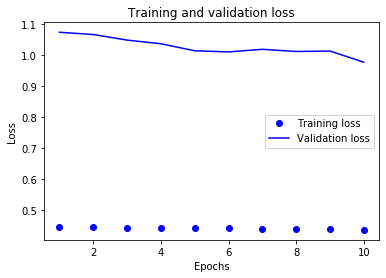

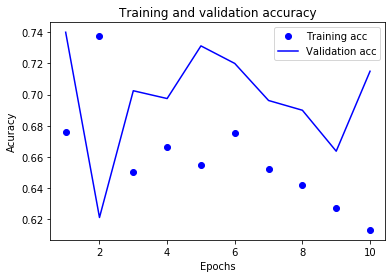

In [104]:
# Plot
loss_plot(history_2)
accu_plot(history_2)

In [105]:
y_pre2 = model_2.predict(x_test_std)
y_pre2

array([[0.41173306, 0.29452097, 0.29374602],
       [0.42867193, 0.29857287, 0.2727552 ],
       [0.42813393, 0.29822108, 0.27364495],
       ...,
       [0.43007234, 0.2985535 , 0.2713742 ],
       [0.42693502, 0.29702088, 0.27604407],
       [0.42483976, 0.2969015 , 0.2782588 ]], dtype=float32)

In [106]:
pre_final_2 = np.argmax(y_pre2,axis=1)

In [107]:
unique2, counts2 = np.unique(pre_final_2, return_counts=True)
dict(zip(unique2, counts2))

{0: 1669, 2: 75}

In [108]:
date_sel = date.iloc[-1752:].copy()
date_sel = date_sel.reset_index().drop('index', axis=1)
date_sel.head()

,Date
0,2012/11/20
1,2012/11/21
2,2012/11/22
3,2012/11/23
4,2012/11/26


In [109]:
predict_file_2 = pd.concat( [date_sel['Date'], pd.Series(pre_final_2)], axis=1 )
predict_file_2.columns = ['Date', 'Label']
predict_file_2[:10]

,Date,Label
0,2012/11/20,0.0
1,2012/11/21,0.0
2,2012/11/22,0.0
3,2012/11/23,0.0
4,2012/11/26,0.0
5,2012/11/27,0.0
6,2012/11/28,0.0
7,2012/11/29,0.0
8,2012/11/30,0.0
9,2012/12/3,0.0


In [110]:
predict_file_2.to_csv("Prediction_2.csv", index = False)

In [111]:
pre_final_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [112]:
y_test_2_index = np.argmax(y_test_2, axis=1)
y_test_2_index

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [113]:
cm2 = confusion_matrix( y_test_2_index,pre_final_2, normalize='all')

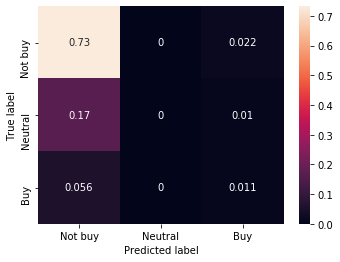

In [114]:
cm2_df = pd.DataFrame(cm2,
                     index = ['Not buy','Neutral','Buy'], 
                     columns = ['Not buy','Neutral','Buy'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm2_df, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()